In [1]:
from osgeo import gdal

In [2]:
band1 = gdal.Open(r'../LC09_L2SP_113063_20220608_20220610_02_T1/LC09_L2SP_113063_20220608_20220610_02_T1_SR_B1.tif')

In [3]:
band1

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001A0E93CC5A0> >

In [4]:
print(band1.GetMetadata())

{'AREA_OR_POINT': 'Point'}


In [5]:
print(band1.RasterCount)

1


In [6]:
print(band1.RasterXSize)

7591


In [7]:
print(band1.RasterYSize)

7731


In [8]:
band2 = gdal.Open(r'../LC09_L2SP_113063_20220608_20220610_02_T1/LC09_L2SP_113063_20220608_20220610_02_T1_SR_B2.tif')

In [9]:
band3 = gdal.Open(r'../LC09_L2SP_113063_20220608_20220610_02_T1/LC09_L2SP_113063_20220608_20220610_02_T1_SR_B3.tif')

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
b1 = band1.ReadAsArray()
b2 = band2.ReadAsArray()
b3 = band3.ReadAsArray()

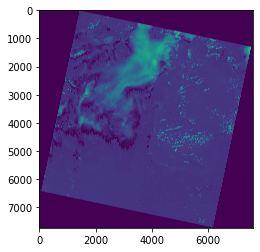

In [14]:
# img = np.dstack((b1,b2,b3))
f = plt.figure()
plt.imshow(b1)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


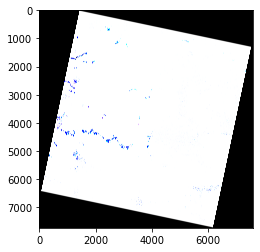

In [15]:
img = np.dstack((b1,b2,b3))
f = plt.figure()
plt.imshow(img)
#plt.savefig('Tiff.png')
plt.show()

In [16]:
band1 = gdal.Open(r'../LC09_L2SP_113063_20220608_20220610_02_T1/LC09_L2SP_113063_20220608_20220610_02_T1_SR_B1.tif')
band2 = gdal.Open(r'../LC09_L2SP_113063_20220608_20220610_02_T1/LC09_L2SP_113063_20220608_20220610_02_T1_SR_B2.tif')
band3 = gdal.Open(r'../LC09_L2SP_113063_20220608_20220610_02_T1/LC09_L2SP_113063_20220608_20220610_02_T1_SR_B3.tif')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


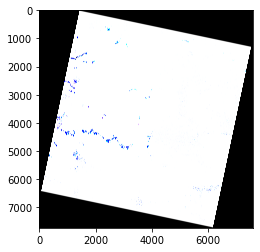

In [17]:
img = np.dstack((b1,b2,b3))
f = plt.figure()
plt.imshow(img)
plt.show()

------------------------------------------------------------------------------------------------------------

## NDVI Calculation

In [18]:
band4 = gdal.Open(r'../LC09_L2SP_113063_20220608_20220610_02_T1/LC09_L2SP_113063_20220608_20220610_02_T1_SR_B4.tif')
band5 = gdal.Open(r'../LC09_L2SP_113063_20220608_20220610_02_T1/LC09_L2SP_113063_20220608_20220610_02_T1_SR_B5.tif')

In [23]:
red_values = band4.ReadAsArray() / 10000
nir_values = band5.ReadAsArray() / 10000
green_values = band3.ReadAsArray() / 10000

In [25]:
import numpy as np
np.seterr(divide='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [26]:
ndvi = (nir_values - red_values) / (nir_values + red_values)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12632\2688554738.py:1: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (nir_values - red_values) / (nir_values + red_values)


In [27]:
ndvi[np.isnan(ndvi)] = 0
print('NDVI matrix: ')
print(ndvi)

print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('\nMean NDVI: {m}'.format(m=ndvi.mean()))
print('\nMedian NDVI: {m}'.format(m=np.median(ndvi)))
print('\nMin NDVI: {m}'.format(m=ndvi.min()))


NDVI matrix: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Max NDVI: 1.0

Mean NDVI: 0.10587384947416013

Median NDVI: 0.014311735623210975

Min NDVI: -1.0


## NDWI Calculation

In [28]:
ndwi = (green_values - nir_values) / (green_values + nir_values)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12632\1226437154.py:1: RuntimeWarning: invalid value encountered in true_divide
  ndwi = (green_values - nir_values) / (green_values + nir_values)


In [29]:
ndwi[np.isnan(ndwi)] = 0
print('NDWI matrix: ')
print(ndwi)

print('\nMax NDWI: {m}'.format(m=ndwi.max()))
print('\nMean NDWI: {m}'.format(m=ndwi.mean()))
print('\nMedian NDWI: {m}'.format(m=np.median(ndwi)))
print('\nMin NDWI: {m}'.format(m=ndwi.min()))

NDWI matrix: 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Max NDWI: 1.0

Mean NDWI: -0.09602920817076928

Median NDWI: 0.0

Min NDWI: -1.0


Tugas Kelompok
- Coba download Landsat image (1 citra satelit) dari earth explorer
- cari studi pemanfaatan citra satelit untuk pemodelan lingkungan
- bidang: perkotaan, pertanian, iklim/cuaca, sumber daya alam
- masalah apa yang berusaha dipecahkan
- satelit apa yang digunakan
- berapa resolusi spasial
- berapa resolusi temporal
- berapa citra yang digunakan pada studi tersebut
- band (spectrum panjang gelombang) apa yang digunakan pada studi: red, green, blue, near infrared (NIR), shortwave infrared(SWIR), thermal infrared(TIR), dll

- citra satelit hasil download punya berapa band
- baca nilai band red, green, dan nir, simpan dalam array
- hitung nilai index vegetasi (NDVI) dan index air (NDWI)